In [25]:
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

# Benchmark runtime: 134.6568365097046

In [26]:
data = open('log_blackscholes.txt', 'r').readlines()

In [27]:
import pandas as pd
columns = data[0].split()
df = pd.DataFrame(columns=columns)
for line in data[1:]:
    df = df.append(pd.Series(line.split(), index=columns), ignore_index=True)

In [28]:
# Change time from unix timestamp to datetime
df['time'] = pd.to_datetime(df['time'], unit='s')

# Round time to nearest 10 milliseconds
df['time'] = df['time'].dt.round('1ms')

# Round all the numeric columns to 2 decimal places
for col in df.columns[1:]:
    df[col] = df[col].astype(float).round(4)

In [29]:
df

,time,W,usage_c0,usage_c1,usage_c2,usage_c3,usage_c4,usage_c5,usage_c6,usage_c7,temp4,temp5,temp6,temp7
0,2023-02-07 21:45:13.906,0.000,0.000,0.000,0.00,0.000,0.000,1.000,0.333,0.00,33.0,45.0,40.0,34.0
1,2023-02-07 21:45:14.106,0.000,0.150,0.000,0.00,0.053,0.050,1.000,0.000,0.00,34.0,45.0,38.0,34.0
2,2023-02-07 21:45:14.306,0.000,0.100,0.000,0.00,0.050,0.000,1.000,0.000,0.00,34.0,46.0,38.0,34.0
3,2023-02-07 21:45:14.506,0.000,0.105,0.000,0.00,0.000,0.048,1.000,0.048,0.05,34.0,46.0,39.0,34.0
4,2023-02-07 21:45:14.707,0.000,0.053,0.000,0.00,0.000,0.000,1.000,0.000,0.00,35.0,46.0,39.0,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,2023-02-07 21:47:22.544,6.416,0.333,0.000,0.00,0.000,0.000,0.125,0.050,1.00,47.0,51.0,52.0,56.0
643,2023-02-07 21:47:22.744,6.416,0.300,0.000,0.00,0.000,0.000,0.118,0.000,1.00,47.0,51.0,52.0,56.0
644,2023-02-07 21:47:22.945,6.210,0.316,0.000,0.00,0.000,0.000,0.118,0.000,1.00,47.0,50.0,52.0,56.0
645,2023-02-07 21:47:23.145,6.210,0.316,0.000,0.00,0.000,0.000,0.176,0.000,1.00,46.0,50.0,52.0,56.0


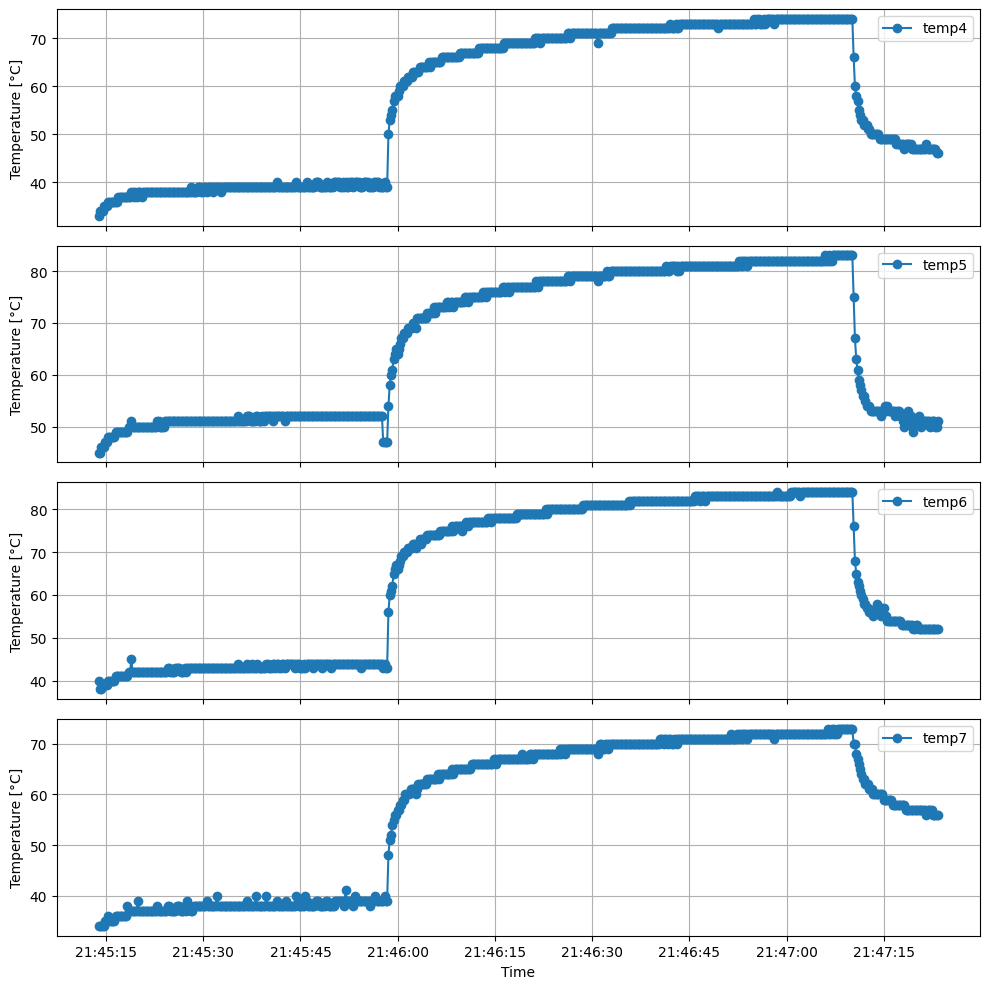

In [30]:
# Make a plot with subplots for each temperature
fig, axes = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(10, 10))

for i, temp in enumerate(['temp4', 'temp5', 'temp6', 'temp7']):
    axes[i].plot(df['time'], df[temp], 'o-', label=temp)
    axes[i].set_ylabel('Temperature [°C]')
    axes[i].legend()
    axes[i].grid()

axes[3].set_xlabel('Time')
fig.tight_layout()



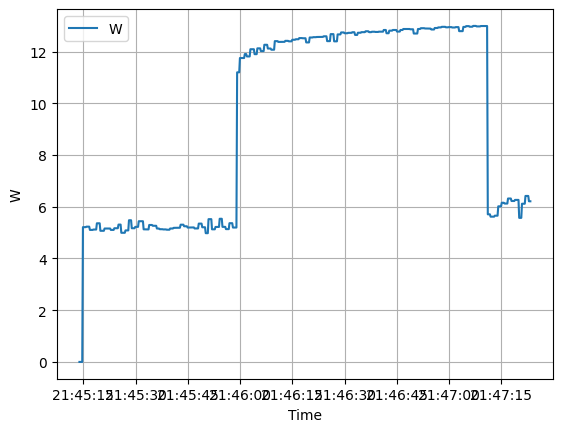

In [31]:
plt.plot(df['time'], df['W'], label='W')
plt.xlabel('Time')
plt.ylabel('W')
plt.legend()
plt.grid()
plt.show()

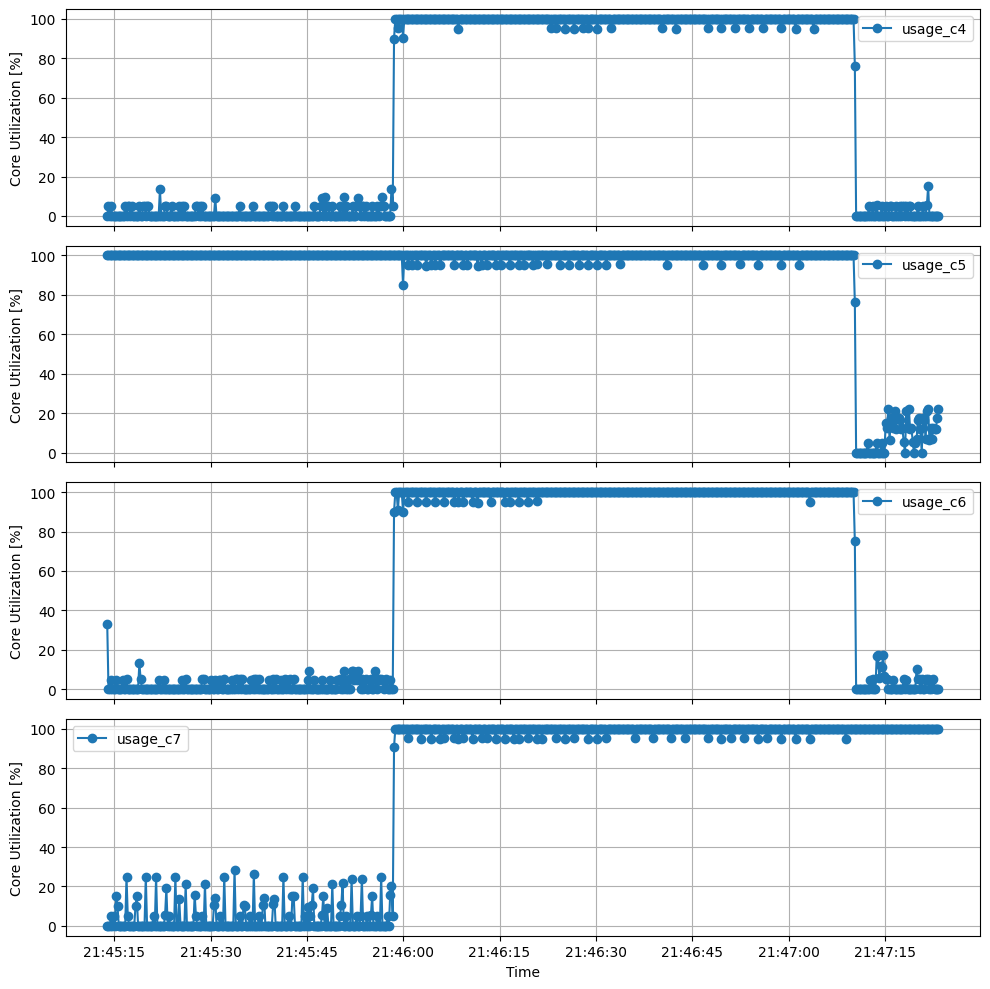

In [32]:
fig, axes = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(10, 10))

for i, usage in enumerate(['usage_c4', 'usage_c5', 'usage_c6', 'usage_c7']):
    axes[i].plot(df['time'], df[usage]*100, 'o-', label=usage)
    axes[i].set_ylabel('Core Utilization [%]')
    axes[i].legend()
    axes[i].grid()

axes[3].set_xlabel('Time')
fig.tight_layout()

In [33]:
# Avergae power consumption
average_power = df['W'].mean()

# Make a new column containing the maximum value of the columns temp4, temp5, temp6, temp7 for each row
df['max_temp'] = df[['temp4', 'temp5', 'temp6', 'temp7']].max(axis=1)

# Mean max temperature
average_max_temp = df['max_temp'].mean()

# Max max temperature
max_max_temp = df['max_temp'].max()

print('Average power consumption: {:.2f} W'.format(average_power))
print('Average max temperature: {:.2f} °C'.format(average_max_temp))
print('Max max temperature: {:.2f} °C'.format(max_max_temp))

# Calculate the energy consumption in Joules as the sum of the power consumption in Watts multiplied by the sampling interval in seconds
#energy_consumption = (df['W'] * 10).sum() # Dont know the sampling interval yet

Average power consumption: 9.36 W
Average max temperature: 67.79 °C
Max max temperature: 84.00 °C
